In [1]:

import pandas as pd
import numpy as np
from IPython import display

In [113]:
# df = pd.read_parquet("mimiciv/2.0/admissions.parquet")
# df2 = pd.read_parquet("mimiciv/2.0/diagnoses_icd.parquet")
# df3 = pd.read_parquet("mimiciv/2.0/outputevents.parquet")

In [127]:
# load the icd diagnoses definition table
icd_diagnoses_df = pd.read_csv("data/features/preproc_diag_icu.csv.gz")

icd_chart_df = pd.read_csv("data/features/preproc_chart_icu.csv.gz")
# load the icd diagnoses definition table
icd_med_df = pd.read_csv("data/features/preproc_med_icu.csv.gz")
# load the icd diagnoses definition table
icd_out_df = pd.read_csv("data/features/preproc_out_icu.csv.gz")
# load the icd diagnoses definition table
icd_proc_df = pd.read_csv("data/features/preproc_proc_icu.csv.gz")
# load info on the ICU stays
icu_stay_df = pd.read_csv("data/cohort/cohort_icu_mortality_0_.csv.gz")

d_items = pd.read_parquet("mimiciv/2.0/d_items.parquet")  # Ensure this file contains 'itemid' and 'label' columns
d_icd_diagnoses = pd.read_parquet("mimiciv/2.0/d_icd_diagnoses.parquet")



In [128]:
icd_diagnoses_df = icd_diagnoses_df.merge(d_icd_diagnoses[['icd_code', 'long_title']], left_on='new_icd_code', right_on='icd_code', how='left')
icd_proc_df = icd_proc_df.merge(d_items[['itemid', 'label', 'linksto', 'category']], left_on='itemid', right_on='itemid', how='left')

## Add readable labels to disease types as well as a column for disease categories

In [129]:
icd_diagnoses_df["disease_type"] = "Unknown"
icd_diagnoses_df.loc[
    ("A00" <= icd_diagnoses_df["new_icd_code"])
    & (icd_diagnoses_df["new_icd_code"] <= "B99"),
    "disease_type",
] = "Infection"
icd_diagnoses_df.loc[
    ("C00" <= icd_diagnoses_df["new_icd_code"])
    & (icd_diagnoses_df["new_icd_code"] <= "D48"),
    "disease_type",
] = "Neoplasm"
icd_diagnoses_df.loc[
    ("D50" <= icd_diagnoses_df["new_icd_code"])
    & (icd_diagnoses_df["new_icd_code"] <= "D89"),
    "disease_type",
] = "Blood and Immune system"
icd_diagnoses_df.loc[
    ("E00" <= icd_diagnoses_df["new_icd_code"])
    & (icd_diagnoses_df["new_icd_code"] <= "E90"),
    "disease_type",
] = "Metabolism and Endocrine"
icd_diagnoses_df.loc[
    ("F00" <= icd_diagnoses_df["new_icd_code"])
    & (icd_diagnoses_df["new_icd_code"] <= "F99"),
    "disease_type",
] = "Psych"
icd_diagnoses_df.loc[
    ("G00" <= icd_diagnoses_df["new_icd_code"])
    & (icd_diagnoses_df["new_icd_code"] <= "G99"),
    "disease_type",
] = "Nervous system"
icd_diagnoses_df.loc[
    ("H00" <= icd_diagnoses_df["new_icd_code"])
    & (icd_diagnoses_df["new_icd_code"] <= "H59"),
    "disease_type",
] = "Eye"
icd_diagnoses_df.loc[
    ("H60" <= icd_diagnoses_df["new_icd_code"])
    & (icd_diagnoses_df["new_icd_code"] <= "H95"),
    "disease_type",
] = "Ear"
icd_diagnoses_df.loc[
    ("I00" <= icd_diagnoses_df["new_icd_code"])
    & (icd_diagnoses_df["new_icd_code"] <= "I99"),
    "disease_type",
] = "Cardiovascular"
icd_diagnoses_df.loc[
    ("J00" <= icd_diagnoses_df["new_icd_code"])
    & (icd_diagnoses_df["new_icd_code"] <= "J99"),
    "disease_type",
] = "Respiratory"
icd_diagnoses_df.loc[
    ("K00" <= icd_diagnoses_df["new_icd_code"])
    & (icd_diagnoses_df["new_icd_code"] <= "K93"),
    "disease_type",
] = "Digestive system"
icd_diagnoses_df.loc[
    ("L00" <= icd_diagnoses_df["new_icd_code"])
    & (icd_diagnoses_df["new_icd_code"] <= "L99"),
    "disease_type",
] = "Skin"
icd_diagnoses_df.loc[
    ("M00" <= icd_diagnoses_df["new_icd_code"])
    & (icd_diagnoses_df["new_icd_code"] <= "M99"),
    "disease_type",
] = "Musculosceletal"
icd_diagnoses_df.loc[
    ("N00" <= icd_diagnoses_df["new_icd_code"])
    & (icd_diagnoses_df["new_icd_code"] <= "N99"),
    "disease_type",
] = "Urogenital system"
icd_diagnoses_df.loc[
    ("O00" <= icd_diagnoses_df["new_icd_code"])
    & (icd_diagnoses_df["new_icd_code"] <= "O99"),
    "disease_type",
] = "Prae-/Neonatal"
icd_diagnoses_df.loc[
    ("P00" <= icd_diagnoses_df["new_icd_code"])
    & (icd_diagnoses_df["new_icd_code"] <= "P96"),
    "disease_type",
] = "Perinatal"
icd_diagnoses_df.loc[
    ("Q00" <= icd_diagnoses_df["new_icd_code"])
    & (icd_diagnoses_df["new_icd_code"] <= "Q99"),
    "disease_type",
] = "Malformations"
icd_diagnoses_df.loc[
    ("R00" <= icd_diagnoses_df["new_icd_code"])
    & (icd_diagnoses_df["new_icd_code"] <= "R99"),
    "disease_type",
] = "Other"
icd_diagnoses_df.loc[
    ("S00" <= icd_diagnoses_df["new_icd_code"])
    & (icd_diagnoses_df["new_icd_code"] <= "Y98"),
    "disease_type",
] = "Posoning, Injury or External"



In [130]:
icd_diagnoses_df.drop(columns=['new_icd_code'], inplace=True)

In [131]:
# Filter to keep only admissions that had a J18 (pneumonia) diagnosis
pneumonia_hadm_ids = icd_diagnoses_df[icd_diagnoses_df["icd_code"].str.startswith("J18")]["hadm_id"].unique()
pneumonia_stay_ids = icd_diagnoses_df[icd_diagnoses_df["icd_code"].str.startswith("J18")]["stay_id"].unique()

# Keep only visits where the `hadm_id` had pneumonia
icd_diagnoses_df = icd_diagnoses_df[icd_diagnoses_df["hadm_id"].isin(pneumonia_hadm_ids)]

# One-hot encode diagnoses
icd_encoded = pd.get_dummies(icd_diagnoses_df, columns=["icd_code"])

# Aggregate by summing (ensuring each `hadm_id` has 1 row)
icd_diagnoses_agg = icd_encoded.groupby("hadm_id").sum().reset_index()

In [124]:
# Aggregate by hadm_id: Store all ICD codes as a list
icd_agg_list = icd_diagnoses_df.groupby("hadm_id").agg(
    icd_codes=("icd_code", lambda x: list(x)),  # Store diagnoses as a list
    disease_categories=("disease_type", lambda x: list(set(x)))  # Unique disease categories
).reset_index()


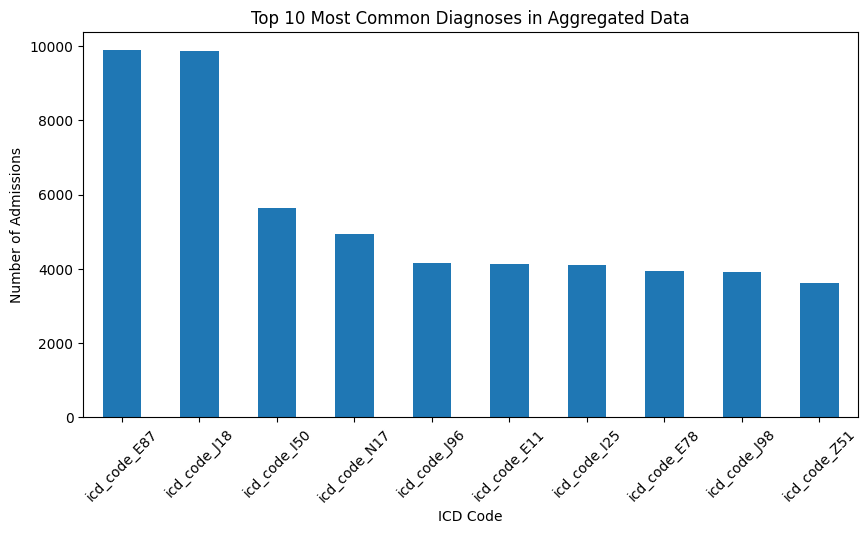

In [81]:
icd_diagnoses_agg.describe(include="all")
import matplotlib.pyplot as plt

# Select only one-hot encoded diagnosis columns
diag_columns = [col for col in icd_agg.columns if col.startswith("icd_code")]

# Count occurrences of each diagnosis
diag_counts = icd_agg[diag_columns].sum().sort_values(ascending=False)

# Plot top 10 diagnoses
plt.figure(figsize=(10, 5))
diag_counts.head(10).plot(kind="bar")
plt.title("Top 10 Most Common Diagnoses in Aggregated Data")
plt.ylabel("Number of Admissions")
plt.xlabel("ICD Code")
plt.xticks(rotation=45)
plt.show()


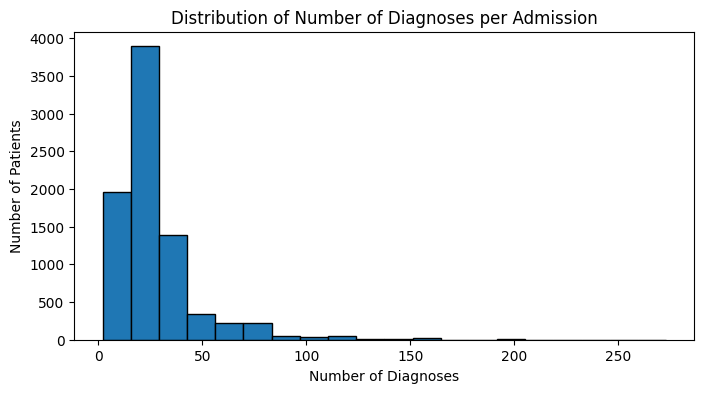

In [128]:
icd_agg_list["num_diagnoses"] = icd_agg_list["icd_codes"].apply(len)

plt.figure(figsize=(8, 4))
plt.hist(icd_agg_list["num_diagnoses"], bins=20, edgecolor="black")
plt.title("Distribution of Number of Diagnoses per Admission")
plt.xlabel("Number of Diagnoses")
plt.ylabel("Number of Patients")
plt.show()



In [85]:
print(icd_diagnoses_agg["hadm_id"].duplicated().sum())  # Should return 0
print(icd_diagnoses_agg.shape[0], "unique hadm_id values")  # Should match expected patient count


0
8196 unique hadm_id values


Lets filter all dfs to keep only the relevant hadm_ids & stay_ids using the pneumonia objects we created earlier

In [132]:
# Ensure the filtered DataFrames retain original columns
filtered_dfs = {
    "icd_chart_df": icd_chart_df[icd_chart_df["stay_id"].isin(pneumonia_stay_ids)].copy(),
    "icd_med_df": icd_med_df[icd_med_df["hadm_id"].isin(pneumonia_hadm_ids)].copy(),
    "icd_out_df": icd_out_df[icd_out_df["hadm_id"].isin(pneumonia_hadm_ids)].copy(),
    "icd_proc_df": icd_proc_df[icd_proc_df["hadm_id"].isin(pneumonia_hadm_ids)].copy(),
    "icu_stay_df": icu_stay_df[icu_stay_df["hadm_id"].isin(pneumonia_hadm_ids)].copy(),
}

# Ensure empty DataFrames still have expected columns
for name, df in filtered_dfs.items():
    if df.empty:
        print(f"⚠ WARNING: {name} is empty after filtering!")
        df = df.reindex(columns=icd_chart_df.columns if "chart" in name else icd_med_df.columns)

# Unpack filtered DataFrames
icd_chart_df, icd_med_df, icd_out_df, icd_proc_df, icu_stay_df = (
    filtered_dfs["icd_chart_df"],
    filtered_dfs["icd_med_df"],
    filtered_dfs["icd_out_df"],
    filtered_dfs["icd_proc_df"],
    filtered_dfs["icu_stay_df"],
)


In [75]:
# Set index for merging
# icu_stay_df.set_index("hadm_id", inplace=True)
# icd_diagnoses_agg.set_index("hadm_id", inplace=True)

# icd_med_df.set_index('hadm_id', inplace=True)
# icd_chart_df.set_index('stay_id', inplace=True)
# icd_out_df.set_index('hadm_id', inplace=True)
# icd_proc_df.set_index('hadm_id', inplace=True)

In [133]:
icd_chart_df2 = icd_chart_df.merge(d_items[['itemid', 'label', 'category', 'unitname']], left_on='itemid', right_on='itemid', how='left')

In [134]:
icd_chart_df2.describe()

,stay_id,itemid,valuenum
count,1.584262e+07,1.584262e+07,1.584262e+07
mean,3.501264e+07,2.222591e+05,1.142066e+02
std,2.897421e+06,2.685788e+03,5.266527e+03
min,3.000048e+07,2.200450e+05,-2.413950e+05
25%,3.249108e+07,2.201800e+05,2.000000e+01
50%,3.505731e+07,2.202770e+05,6.500000e+01
75%,3.755789e+07,2.245620e+05,9.800000e+01
max,3.999923e+07,2.301070e+05,9.710010e+06


In [135]:
# Ensure itemid is treated as a string
icd_chart_df2["itemid"] = icd_chart_df2["itemid"].astype(str)

# Remove rows where category is "Alarms"
icd_chart_df2 = icd_chart_df2[icd_chart_df2["category"] != "Alarms"]

# Count how many unique ICU stays each itemid appears in
events_by_stay = icd_chart_df2.groupby("itemid")["stay_id"].nunique()

# Dynamically get the total number of unique ICU stays
total_stays = icd_chart_df2["stay_id"].nunique()

# Keep only itemids that appear in at least 60% of ICU stays
most_common_events = events_by_stay.loc[(events_by_stay / total_stays) > 0.60]

# Convert itemid index to a list
idx_lst = most_common_events.index.astype(str).tolist()

# Extract labels from icd_chart_df2
id_to_name = icd_chart_df2[["itemid", "label"]].drop_duplicates().set_index("itemid")["label"].to_dict()

# ✅ Create the summary DataFrame
summary_df = most_common_events.reset_index()
summary_df.columns = ["itemid", "unique_stay_count"]

# Ensure itemid is a string before mapping
summary_df["itemid"] = summary_df["itemid"].astype(str)

# Map itemid to labels from icd_chart_df2
summary_df["label"] = summary_df["itemid"].map(id_to_name)

# Calculate percentage of ICU stays where each itemid appears
summary_df["percentage_of_stays"] = (summary_df["unique_stay_count"] / total_stays) * 100

# Sort by most frequent first
summary_df = summary_df.sort_values(by="unique_stay_count", ascending=False)

summary_df

,itemid,unique_stay_count,label,percentage_of_stays
0,220045,9863,Heart Rate,99.989862
4,220210,9858,Respiratory Rate,99.939173
6,220277,9850,O2 saturation pulseoxymetry,99.858070
3,220181,9761,Non Invasive Blood Pressure mean,98.955799
1,220179,9755,Non Invasive Blood Pressure systolic,98.894972
2,220180,9754,Non Invasive Blood Pressure diastolic,98.884834
16,223761,9732,Temperature Fahrenheit,98.661800
26,227442,9590,Potassium (serum),97.222222
11,220615,9589,Creatinine (serum),97.212084
10,220602,9587,Chloride (serum),97.191809


## Filter to keep only measures that are common to more than 60% of icu cases.

In [ ]:
idx_lst

In [136]:
# Filter icd_chart_df2 to keep only the most common itemids
icd_chart_df2 = icd_chart_df2[icd_chart_df2["itemid"].isin(idx_lst)]


Cleaning

In [137]:
from scipy.stats.mstats import winsorize

# Winsorize function (applies to each group of itemid)
def winsorize_series(series):
    return winsorize(series, limits=[0.01, 0.01])  # Trim 1% from both tails

# Apply winsorization per itemid
icd_chart_df2["valuenum"] = icd_chart_df2.groupby("itemid")["valuenum"].transform(lambda x: winsorize_series(x))


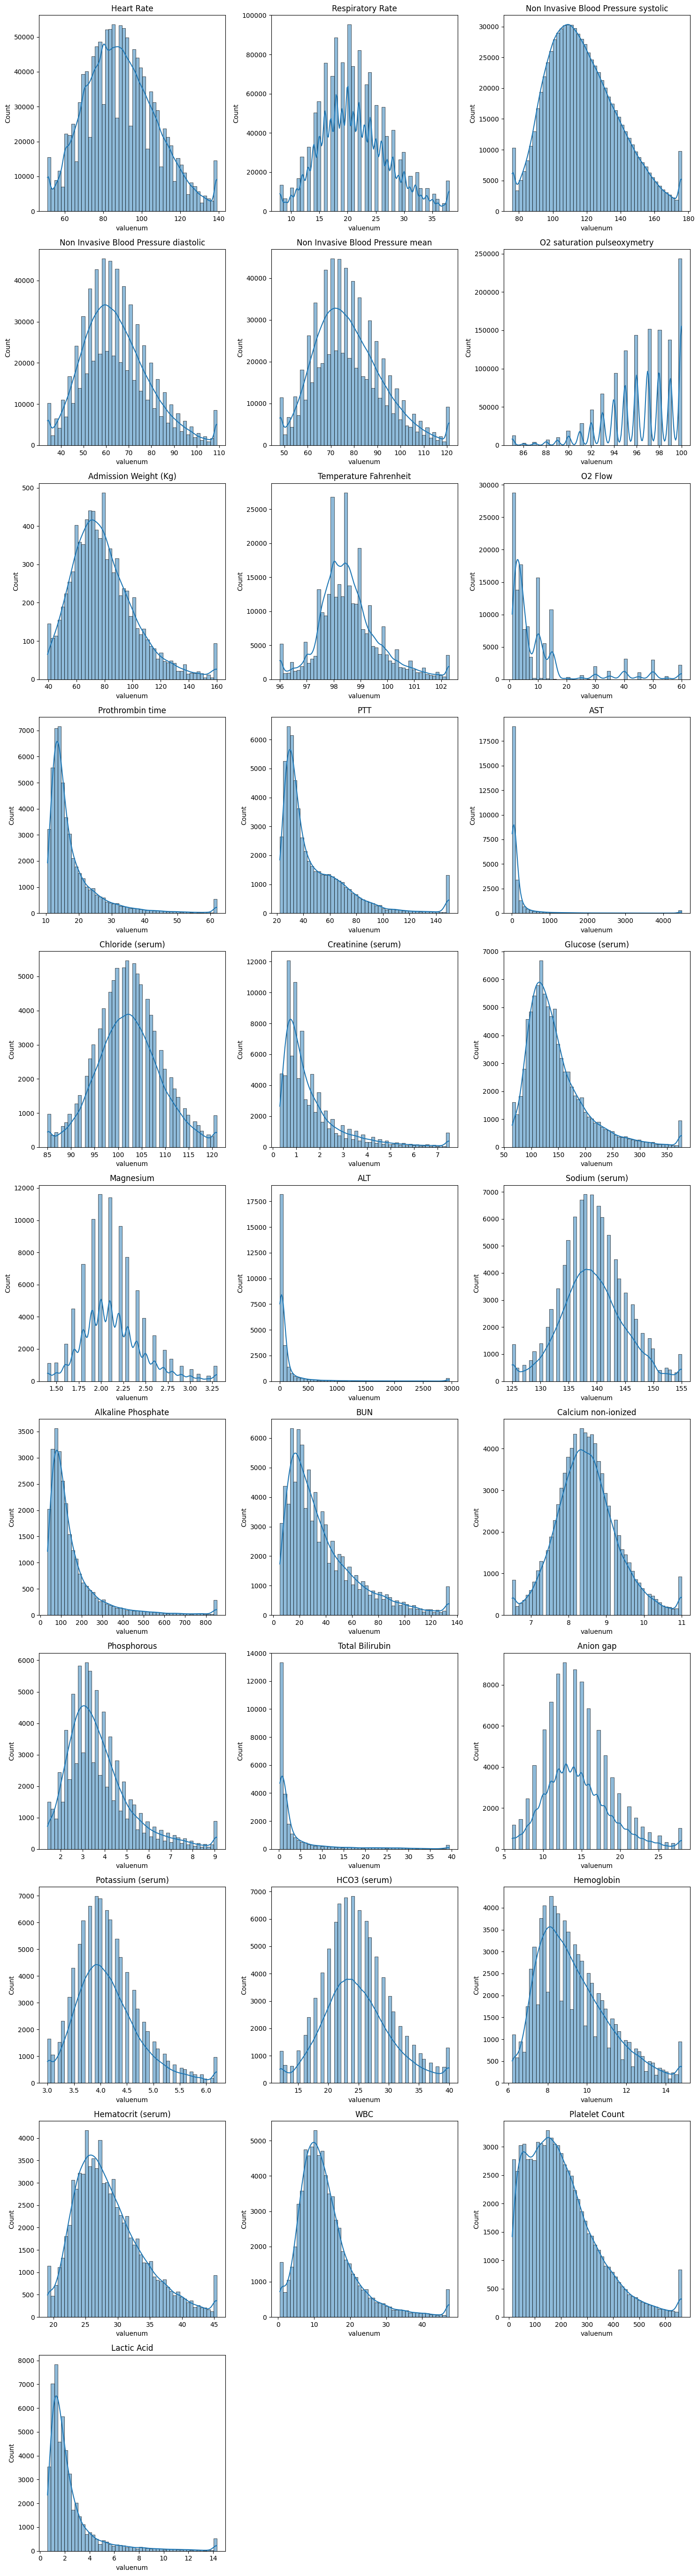

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the unique itemids for visualization
unique_itemids = icd_chart_df2["itemid"].unique()

# Set up subplots
num_items = len(unique_itemids)
num_cols = 3  # Display 3 plots per row
num_rows = (num_items // num_cols) + (1 if num_items % num_cols != 0 else 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))

# Flatten axes array for easier indexing
axes = axes.flatten()

# Plot distributions for each itemid
for i, itemid in enumerate(unique_itemids):
    ax = axes[i]

    # Get label associated with the itemid, handling missing values
    label_row = icd_chart_df2.loc[icd_chart_df2["itemid"] == itemid, "label"]
    label = label_row.iloc[0] if not label_row.isna().all() else f"ItemID: {itemid}"  # Fallback if label is NaN

    # Plot distribution
    sns.histplot(icd_chart_df2[icd_chart_df2["itemid"] == itemid]["valuenum"], bins=50, kde=True, ax=ax)
    ax.set_title(f"{label}")  # Use label if available

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [138]:
# Define aggregation functions
agg_dict = {
    "valuenum_min": ("valuenum", "min"),
    "valuenum_max": ("valuenum", "max"),
    "valuenum_avg": ("valuenum", "mean"),
}

# Aggregate by stay_id and itemid
agg_results = icd_chart_df2.groupby(["stay_id", "itemid"]).agg(**agg_dict).reset_index()

# Pivot to wide format so each itemid gets its own column
agg_results = agg_results.pivot(index="stay_id", columns="itemid", values=["valuenum_min", "valuenum_max", "valuenum_avg"])

# Flatten column names
agg_results.columns = [f"{stat}_{str(itemid)}" for stat, itemid in agg_results.columns]

# Reset index to keep stay_id as a column
agg_results = agg_results.reset_index()


In [139]:
# Merge aggregated results into icu_stay_df
icu_stay_df = icu_stay_df.merge(agg_results, on="stay_id", how="left")

In [6]:
# general overview of PATIENTS data
display.display(icu_stay_df.info(show_counts=1))
display.display(icu_stay_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94444 entries, 0 to 94443
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   subject_id  94444 non-null  int64 
 1   stay_id     94444 non-null  int64 
 2   intime      94444 non-null  object
 3   outtime     94444 non-null  object
 4   Age         94444 non-null  int64 
 5   gender      94444 non-null  object
 6   ethnicity   94444 non-null  object
 7   insurance   94444 non-null  object
 8   label       94444 non-null  int64 
 9   dod         94444 non-null  object
 10  hadm_id     94444 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 7.9+ MB


None

,subject_id,stay_id,Age,label,hadm_id
count,9.444400e+04,9.444400e+04,94444.000000,94444.000000,9.444400e+04
mean,1.500423e+07,3.499823e+07,63.039780,0.071439,2.498162e+07
std,2.884057e+06,2.886443e+06,16.716351,0.257558,2.884105e+06
min,1.000003e+07,3.000015e+07,18.000000,0.000000,2.000009e+07
25%,1.251469e+07,3.250671e+07,53.000000,0.000000,2.248155e+07
50%,1.500515e+07,3.499944e+07,65.000000,0.000000,2.498182e+07
75%,1.751771e+07,3.749097e+07,76.000000,0.000000,2.746508e+07
max,1.999999e+07,3.999986e+07,91.000000,1.000000,2.999983e+07


In [19]:
icd_diagnoses_df["disease_type"] = "Unknown"
icd_diagnoses_df.loc[
    ("A00" <= icd_diagnoses_df["new_icd_code"])
    & (icd_diagnoses_df["new_icd_code"] <= "B99"),
    "disease_type",
] = "Infection"
icd_diagnoses_df.loc[
    ("C00" <= icd_diagnoses_df["new_icd_code"])
    & (icd_diagnoses_df["new_icd_code"] <= "D48"),
    "disease_type",
] = "Neoplasm"
icd_diagnoses_df.loc[
    ("D50" <= icd_diagnoses_df["new_icd_code"])
    & (icd_diagnoses_df["new_icd_code"] <= "D89"),
    "disease_type",
] = "Blood and Immune system"
icd_diagnoses_df.loc[
    ("E00" <= icd_diagnoses_df["new_icd_code"])
    & (icd_diagnoses_df["new_icd_code"] <= "E90"),
    "disease_type",
] = "Metabolism and Endocrine"
icd_diagnoses_df.loc[
    ("F00" <= icd_diagnoses_df["new_icd_code"])
    & (icd_diagnoses_df["new_icd_code"] <= "F99"),
    "disease_type",
] = "Psych"
icd_diagnoses_df.loc[
    ("G00" <= icd_diagnoses_df["new_icd_code"])
    & (icd_diagnoses_df["new_icd_code"] <= "G99"),
    "disease_type",
] = "Nervous system"
icd_diagnoses_df.loc[
    ("H00" <= icd_diagnoses_df["new_icd_code"])
    & (icd_diagnoses_df["new_icd_code"] <= "H59"),
    "disease_type",
] = "Eye"
icd_diagnoses_df.loc[
    ("H60" <= icd_diagnoses_df["new_icd_code"])
    & (icd_diagnoses_df["new_icd_code"] <= "H95"),
    "disease_type",
] = "Ear"
icd_diagnoses_df.loc[
    ("I00" <= icd_diagnoses_df["new_icd_code"])
    & (icd_diagnoses_df["new_icd_code"] <= "I99"),
    "disease_type",
] = "Cardiovascular"
icd_diagnoses_df.loc[
    ("J00" <= icd_diagnoses_df["new_icd_code"])
    & (icd_diagnoses_df["new_icd_code"] <= "J99"),
    "disease_type",
] = "Respiratory"
icd_diagnoses_df.loc[
    ("K00" <= icd_diagnoses_df["new_icd_code"])
    & (icd_diagnoses_df["new_icd_code"] <= "K93"),
    "disease_type",
] = "Digestive system"
icd_diagnoses_df.loc[
    ("L00" <= icd_diagnoses_df["new_icd_code"])
    & (icd_diagnoses_df["new_icd_code"] <= "L99"),
    "disease_type",
] = "Skin"
icd_diagnoses_df.loc[
    ("M00" <= icd_diagnoses_df["new_icd_code"])
    & (icd_diagnoses_df["new_icd_code"] <= "M99"),
    "disease_type",
] = "Musculosceletal"
icd_diagnoses_df.loc[
    ("N00" <= icd_diagnoses_df["new_icd_code"])
    & (icd_diagnoses_df["new_icd_code"] <= "N99"),
    "disease_type",
] = "Urogenital system"
icd_diagnoses_df.loc[
    ("O00" <= icd_diagnoses_df["new_icd_code"])
    & (icd_diagnoses_df["new_icd_code"] <= "O99"),
    "disease_type",
] = "Prae-/Neonatal"
icd_diagnoses_df.loc[
    ("P00" <= icd_diagnoses_df["new_icd_code"])
    & (icd_diagnoses_df["new_icd_code"] <= "P96"),
    "disease_type",
] = "Perinatal"
icd_diagnoses_df.loc[
    ("Q00" <= icd_diagnoses_df["new_icd_code"])
    & (icd_diagnoses_df["new_icd_code"] <= "Q99"),
    "disease_type",
] = "Malformations"
icd_diagnoses_df.loc[
    ("R00" <= icd_diagnoses_df["new_icd_code"])
    & (icd_diagnoses_df["new_icd_code"] <= "R99"),
    "disease_type",
] = "Other"
icd_diagnoses_df.loc[
    ("S00" <= icd_diagnoses_df["new_icd_code"])
    & (icd_diagnoses_df["new_icd_code"] <= "Y98"),
    "disease_type",
] = "Posoning, Injury or External"

In [20]:
# general overview of ADMISSION data
display.display(icd_diagnoses_df.info(show_counts=1))
display.display(icd_diagnoses_df.describe())
icd_diagnoses_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686996 entries, 0 to 1686995
Data columns (total 7 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   subject_id    1686996 non-null  int64 
 1   hadm_id       1686996 non-null  int64 
 2   stay_id       1686996 non-null  int64 
 3   new_icd_code  1686996 non-null  object
 4   icd_code      1686996 non-null  object
 5   long_title    1686996 non-null  object
 6   disease_type  1686996 non-null  object
dtypes: int64(3), object(4)
memory usage: 90.1+ MB


None

,subject_id,hadm_id,stay_id
count,1.686996e+06,1.686996e+06,1.686996e+06
mean,1.499770e+07,2.498630e+07,3.499485e+07
std,2.882225e+06,2.879687e+06,2.887695e+06
min,1.000003e+07,2.000009e+07,3.000015e+07
25%,1.251347e+07,2.248833e+07,3.250552e+07
50%,1.499385e+07,2.500508e+07,3.499382e+07
75%,1.750713e+07,2.745631e+07,3.748849e+07
max,1.999999e+07,2.999983e+07,3.999986e+07


,subject_id,hadm_id,stay_id,new_icd_code,icd_code,long_title,disease_type
0,10000032,29079034,39553978,I95,I95,Hypotension,Cardiovascular
1,10000032,29079034,39553978,B15,B15,Acute hepatitis A,Infection
2,10000032,29079034,39553978,R69,R69,"Illness, unspecified",Other
3,10000032,29079034,39553978,E87,E87,"Other disorders of fluid, electrolyte and acid...",Metabolism and Endocrine
4,10000032,29079034,39553978,R10,R10,Abdominal and pelvic pain,Other


In [15]:
display.display(icd_med_df.info(show_counts=1))
display.display(icd_med_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5891890 entries, 0 to 5891889
Data columns (total 11 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   subject_id              5891890 non-null  int64  
 1   hadm_id                 5891890 non-null  int64  
 2   stay_id                 5891890 non-null  int64  
 3   itemid                  5891890 non-null  int64  
 4   starttime               5891890 non-null  object 
 5   endtime                 5891890 non-null  object 
 6   start_hours_from_admit  5891890 non-null  float64
 7   stop_hours_from_admit   5891890 non-null  float64
 8   rate                    5891890 non-null  float64
 9   amount                  5891890 non-null  float64
 10  orderid                 5891890 non-null  int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 494.5+ MB


None

,subject_id,hadm_id,stay_id,itemid,start_hours_from_admit,stop_hours_from_admit,rate,amount,orderid
count,5.891890e+06,5.891890e+06,5.891890e+06,5.891890e+06,5.891890e+06,5.891890e+06,5.891890e+06,5.891890e+06,5.891890e+06
mean,1.498188e+07,2.501854e+07,3.500239e+07,2.243254e+05,1.248489e+02,1.287459e+02,6.173329e+01,2.947463e+02,5.000798e+06
std,2.897741e+06,2.853331e+06,2.898032e+06,2.473325e+03,1.864078e+02,1.870423e+02,1.083527e+03,1.729980e+03,2.886427e+06
min,1.000069e+07,2.000009e+07,3.000015e+07,2.209490e+05,-3.363783e+02,-3.349617e+02,-9.060000e+02,-8.242695e+02,3.000000e+00
25%,1.245340e+07,2.255239e+07,3.248812e+07,2.219060e+05,1.605000e+01,1.930000e+01,2.308820e+00,3.861184e+00,2.501415e+06
50%,1.496406e+07,2.506045e+07,3.501862e+07,2.251580e+05,5.655667e+01,6.089542e+01,1.203046e+01,2.578373e+01,5.003494e+06
75%,1.749316e+07,2.744506e+07,3.752547e+07,2.259430e+05,1.605654e+02,1.651006e+02,4.486172e+01,1.000000e+02,7.498819e+06
max,1.999999e+07,2.999983e+07,3.999986e+07,2.300440e+05,3.826526e+03,3.831976e+03,1.500000e+06,1.000400e+06,9.999999e+06


In [10]:
display.display(icd_proc_df.info(show_counts=1))
display.display(icd_proc_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808485 entries, 0 to 808484
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   subject_id             808485 non-null  int64 
 1   hadm_id                808485 non-null  int64 
 2   stay_id                808485 non-null  int64 
 3   itemid                 808485 non-null  int64 
 4   starttime              808485 non-null  object
 5   intime                 808485 non-null  object
 6   event_time_from_admit  808485 non-null  object
dtypes: int64(4), object(3)
memory usage: 43.2+ MB


None

,subject_id,hadm_id,stay_id,itemid
count,8.084850e+05,8.084850e+05,8.084850e+05,808485.000000
mean,1.499935e+07,2.499680e+07,3.499756e+07,225290.073298
std,2.891781e+06,2.876806e+06,2.892043e+06,1782.468883
min,1.000003e+07,2.000009e+07,3.000015e+07,221214.000000
25%,1.249176e+07,2.250375e+07,3.248954e+07,224275.000000
50%,1.500373e+07,2.500844e+07,3.499512e+07,225402.000000
75%,1.750918e+07,2.746807e+07,3.750503e+07,225752.000000
max,1.999999e+07,2.999983e+07,3.999986e+07,229984.000000
